# Jogos Olímpicos

## Análise exploratória com os dados dos Jogos Olímpicos 


##### - Evolução da participação feminina (mundial e na equipe olímpica brasileira)
##### - Share de medalhas ( top 3 países no quadro de medalhas vs o resto)

##### A ideia dessas análises surgiu durante as Olímpiadas de Tóquio 2020. ( falta atualizar com os dados de 2020)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jogos = pd.read_csv('C:/Users/mcaio/Desktop/Jogos Olimpicos/athlete_events.csv')

regioes = pd.read_csv('C:/Users/mcaio/Desktop/Jogos Olimpicos/noc_regions.csv')

In [3]:
dados = pd.merge(jogos, regioes, how = 'left', on = 'NOC')

## 1.0 - Participação feminina nos Jogos Olímpicos

In [4]:
atletas = dados[dados['Season'] == 'Summer'].groupby(['NOC', 'Year', 'Sex'])['Name'].count().reset_index()

In [5]:
atletas = atletas.pivot_table(values = 'Name', index = ['NOC', 'Year'], columns = 'Sex', aggfunc = 'sum').fillna(0).reset_index()

atletas = atletas.groupby('Year')[['F','M']].sum().reset_index()

atletas['total'] = atletas['M'] + atletas['F']

atletas['proporcao_mulher'] = (atletas['F'] / atletas['total']*100)

atletas['proporcao_mulher'] = atletas['proporcao_mulher'].round(1)

atletas

Sex,Year,F,M,total,proporcao_mulher
0,1896,0.0,380.0,380.0,0.0
1,1900,33.0,1903.0,1936.0,1.7
2,1904,16.0,1285.0,1301.0,1.2
3,1906,11.0,1722.0,1733.0,0.6
4,1908,47.0,3054.0,3101.0,1.5
5,1912,87.0,3953.0,4040.0,2.2
6,1920,134.0,4158.0,4292.0,3.1
7,1924,244.0,4989.0,5233.0,4.7
8,1928,404.0,4588.0,4992.0,8.1
9,1932,347.0,2622.0,2969.0,11.7


In [6]:
for i, x in enumerate(atletas):
    if atletas[x].dtype == 'float64':
        atletas[x] = atletas[x].astype(int)
    

In [7]:
atletas.head(3)

Sex,Year,F,M,total,proporcao_mulher
0,1896,0,380,380,0
1,1900,33,1903,1936,1
2,1904,16,1285,1301,1


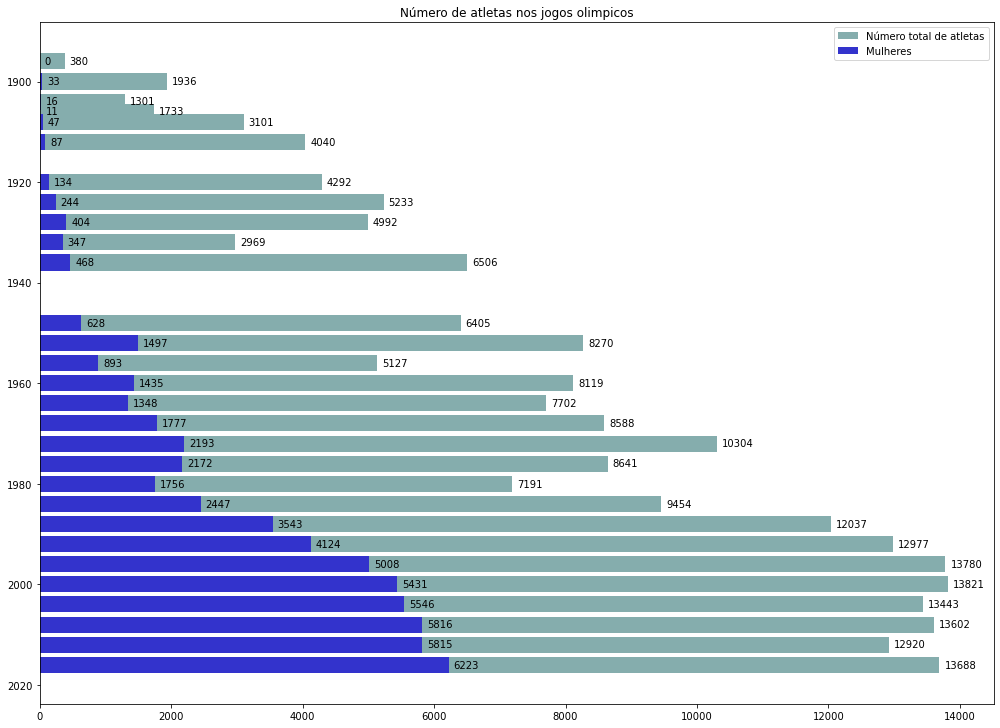

In [8]:
fig, ax = plt.subplots(figsize = (14,10))

ax.barh(atletas['Year'], atletas['total'],height=3.2, align='center', color = '#85adad')
ax.barh(atletas['Year'], atletas['F'],height=3.2, align='center', color = '#3333cc')


ax.invert_yaxis()  # labels read top-to-bottom
plt.tight_layout()
plt.title('Número de atletas nos jogos olimpicos')
plt.legend(['Número total de atletas', 'Mulheres'])



rects = ax.patches

# obrigado stackoverflow
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'

    
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.0f}".format(x_value)

    
    plt.annotate(
        label,                     
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',               
        ha=ha,)


Text(0.5, 0, '')

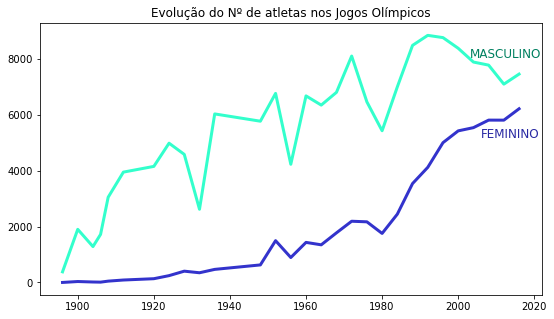

In [9]:
plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="M", data=atletas, linewidth = 3, color = '#33ffcc')
g = sns.lineplot(x="Year", y="F", data=atletas, linewidth = 3, color = '#3333cc')


plt.text(2003,8050, 'MASCULINO', fontsize = 12, color = '#008060')
plt.text(2006,5200, 'FEMININO', fontsize = 12, color = '#2929a3')


plt.title('Evolução do Nº de atletas nos Jogos Olímpicos')
plt.ylabel('')
plt.xlabel("")

Text(0.5, 0, '')

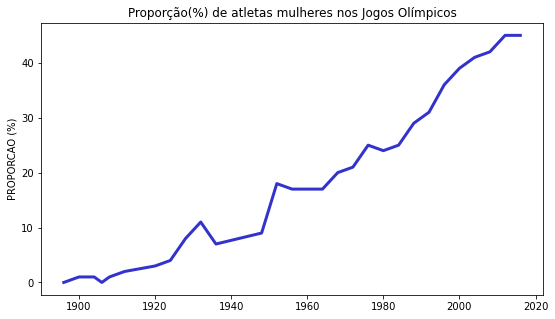

In [9]:
plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="proporcao_mulher", data=atletas, linewidth = 3, color = '#3333cc')


plt.title('Proporção(%) de atletas mulheres nos Jogos Olímpicos')
plt.ylabel('PROPORCAO (%)')
plt.xlabel("")

## 1.1 Participação Feminina na equipe olímpica brasileira

In [10]:
mulheres_bra = dados[(dados['Season'] == 'Summer') & (dados['NOC'] == 'BRA')].groupby(['NOC', 'Year', 'Sex'])['Name'].count().reset_index()


In [11]:
mulheres_bra = mulheres_bra.pivot_table(values = 'Name', index = ['NOC', 'Year'], columns = 'Sex', aggfunc = 'sum').fillna(0).reset_index()

#mulheres_bra = mulheres_bra.groupby('Year')[['F','M']].sum().reset_index()

mulheres_bra['total'] = mulheres_bra['M'] + mulheres_bra['F']

mulheres_bra['proporcao_mulher'] = (mulheres_bra['F'] / mulheres_bra['total']*100)

mulheres_bra['proporcao_mulher'] = mulheres_bra['proporcao_mulher'].round(1)

mulheres_bra

Sex,NOC,Year,F,M,total,proporcao_mulher
0,BRA,1900,0.0,3.0,3.0,0.0
1,BRA,1920,0.0,38.0,38.0,0.0
2,BRA,1924,0.0,18.0,18.0,0.0
3,BRA,1932,3.0,64.0,67.0,4.5
4,BRA,1936,8.0,86.0,94.0,8.5
5,BRA,1948,22.0,83.0,105.0,21.0
6,BRA,1952,8.0,111.0,119.0,6.7
7,BRA,1956,1.0,62.0,63.0,1.6
8,BRA,1960,1.0,85.0,86.0,1.2
9,BRA,1964,1.0,64.0,65.0,1.5


In [12]:
for i, x in enumerate(mulheres_bra):
    if mulheres_bra[x].dtype == 'float64':
        mulheres_bra[x] = mulheres_bra[x].astype(int)

In [13]:
mulheres_bra = mulheres_bra.rename(columns = {'F':'F_bra', 'M':'M_bra', 'total':'total_bra', 'proporcao_mulher': 'prop_bra'})


mulheres = pd.merge(atletas, mulheres_bra,how='left', on = 'Year')


mulheres = mulheres.fillna({'F_bra':0, 'M_bra': 0, 'total_bra': 0, 'prop_bra':0, 'NOC':'BRA'})


Text(0.5, 0, '')

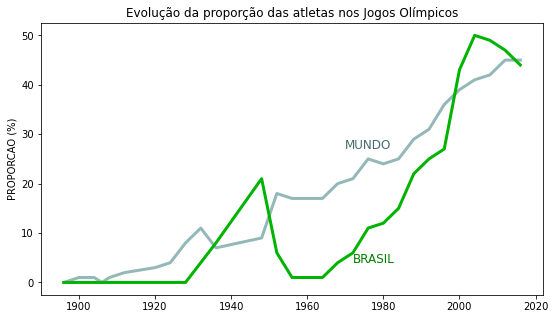

In [14]:
plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="proporcao_mulher", data=mulheres, linewidth = 3, color = "#94b8b8")
g = sns.lineplot(x="Year", y="prop_bra", data=mulheres, linewidth = 3, color = '#00b300')


plt.text(1972,4, 'BRASIL', fontsize = 12, color = '#008000')
plt.text(1970,27, 'MUNDO', fontsize = 12, color = '#476b6b')


plt.title('Evolução da proporção das atletas nos Jogos Olímpicos')
plt.ylabel('PROPORCAO (%)')
plt.xlabel("")

Text(0.5, 0, '')

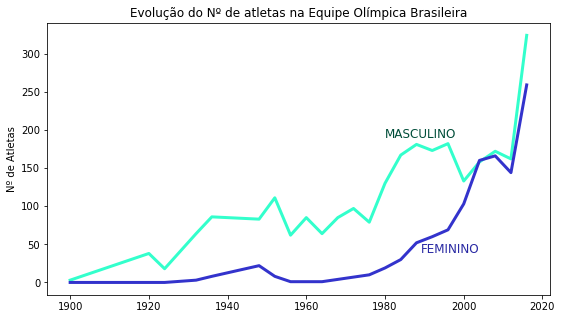

In [15]:
plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="M_bra", data=mulheres_bra, linewidth = 3, color = '#33ffcc')
g = sns.lineplot(x="Year", y="F_bra", data=mulheres_bra, linewidth = 3, color = '#3333cc')

plt.text(1980,190, 'MASCULINO', fontsize = 12, color = '#004d39')
plt.text(1989,39, 'FEMININO', fontsize = 12, color = '#2929a3')


plt.title('Evolução do Nº de atletas na Equipe Olímpica Brasileira')
plt.ylabel('Nº de Atletas')
plt.xlabel("")

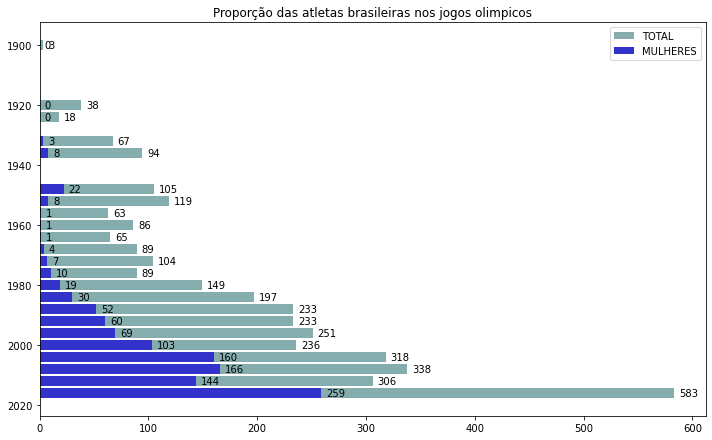

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

ax.barh(mulheres_bra['Year'], mulheres_bra['total_bra'],height=3.2, align='center', color = '#85adad')
ax.barh(mulheres_bra['Year'], mulheres_bra['F_bra'],height=3.2, align='center', color = '#3333cc')

ax.invert_yaxis()  # labels read top-to-bottom


# THANK YOU STACKOVERFLOW
rects = ax.patches


for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.0f}".format(x_value)

    plt.annotate(
        label,                     
        (x_value, y_value),        
        xytext=(space, 0),         
        textcoords="offset points",
        va='center',               
        ha=ha,)


plt.tight_layout()
plt.title('Proporção das atletas brasileiras nos jogos olimpicos')
plt.legend(['TOTAL', 'MULHERES'])

### E com relação as medalhas ? Será que com o passar dos anos a porção de medalhas conquistadas pelos 3 primeiros países do quadro diminuiu?

## 2 - Share de medalhas

In [17]:
medalhas_totais = dados.dropna(subset = ['Medal'])

medalhas_totais = medalhas_totais[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

medalhas_totais = medalhas_totais[medalhas_totais['Season'] == 'Summer']

In [18]:
medalhas_totais = medalhas_totais.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

medalhas_totais = medalhas_totais.groupby(['NOC', 'Year']).sum().reset_index()

medalhas_totais = medalhas_totais.groupby('Year')[['Medal']].sum().reset_index().rename(columns = {'Medal': 'Medalhas_totais'})

In [19]:
medalhas_totais

,Year,Medalhas_totais
0,1896,120
1,1900,291
2,1904,279
3,1906,224
4,1908,320
5,1912,316
6,1920,446
7,1924,391
8,1928,356
9,1932,370


#### Selecionando os 3 primeiros países no quadro de medalhas

In [20]:
podio = dados.dropna(subset = ['Medal'])

podio = podio[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

podio = podio[podio['Season'] == 'Summer']

In [21]:
podio = podio.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

podio = podio.groupby(['NOC', 'Year'])[['Medal']].sum().reset_index()

podio = podio.sort_values(['Year', 'Medal'], ascending = False).groupby('Year').head(3)

podio = podio.groupby('Year')[['Medal']].sum().reset_index()

#### Juntando as duas bases

In [22]:
share_total = pd.merge(podio, medalhas_totais, how='left', on = 'Year')

share_total = share_total.dropna()

share_total['Medal'] = share_total['Medal'].astype(int)

share_total['proporcao'] = (share_total['Medal']/share_total['Medalhas_totais']*100).round(1)

In [23]:
share_total

,Year,Medal,Medalhas_totais,proporcao
0,1896,77,120,64.2
1,1900,198,291,68.0
2,1904,252,279,90.3
3,1906,101,224,45.1
4,1908,214,320,66.9
5,1912,169,316,53.5
6,1920,202,446,45.3
7,1924,176,391,45.0
8,1928,120,356,33.7
9,1932,171,370,46.2


Text(0.5, 0, '')

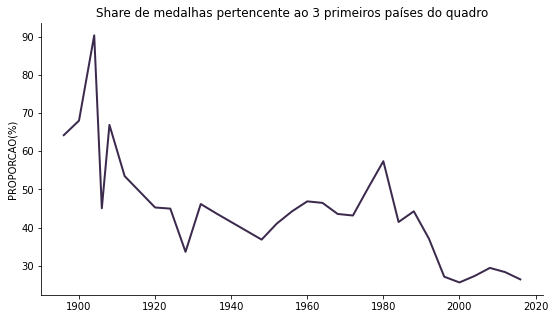

In [29]:
plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="proporcao", data=share_total, linewidth = 2, color = '#3c2a4d')

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)



plt.title('Share de medalhas pertencente ao 3 primeiros países do quadro')
plt.ylabel('PROPORCAO(%)')
plt.xlabel(None)

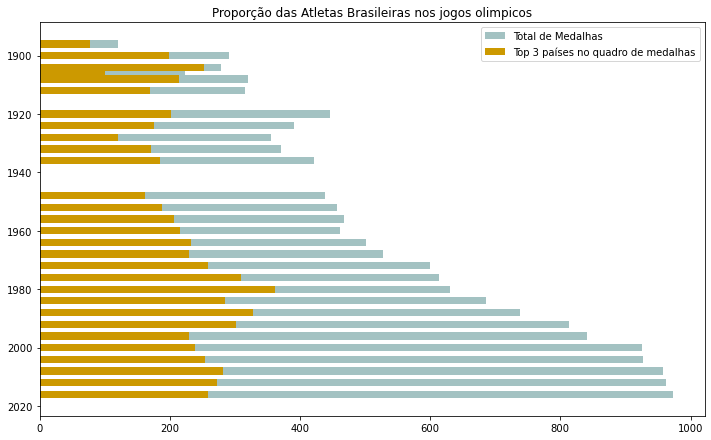

In [31]:
fig, ax = plt.subplots(figsize = (10,6))

ax.barh(share_total['Year'], share_total['Medalhas_totais'],height=2.5, align='center', color = '#a3c2c2')
ax.barh(share_total['Year'], share_total['Medal'],height=2.5, align='center', color = '#cc9900')

ax.invert_yaxis() 
plt.tight_layout()
plt.title('Proporção das Atletas Brasileiras nos jogos olimpicos')
plt.legend(['Total de Medalhas', 'Top 3 países no quadro de medalhas'])

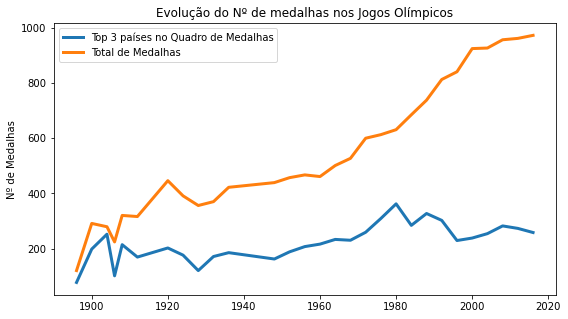

In [37]:
fig, ax = plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="Medal", data=share_total, linewidth = 3)
g = sns.lineplot(x="Year", y="Medalhas_totais", data=share_total, linewidth = 3)

plt.title('Evolução do Nº de medalhas nos Jogos Olímpicos')
plt.ylabel('Nº de Medalhas')
plt.xlabel("")
plt.legend(['Top 3 países no Quadro de Medalhas','Total de Medalhas'])

### Número de países participando dos Jogos Olímpicos

In [33]:
paises = dados[dados['Season'] == 'Summer'].groupby('Year')[['NOC']].nunique().reset_index()

In [34]:
paises

,Year,NOC
0,1896,12
1,1900,31
2,1904,15
3,1906,21
4,1908,22
5,1912,29
6,1920,29
7,1924,45
8,1928,46
9,1932,47


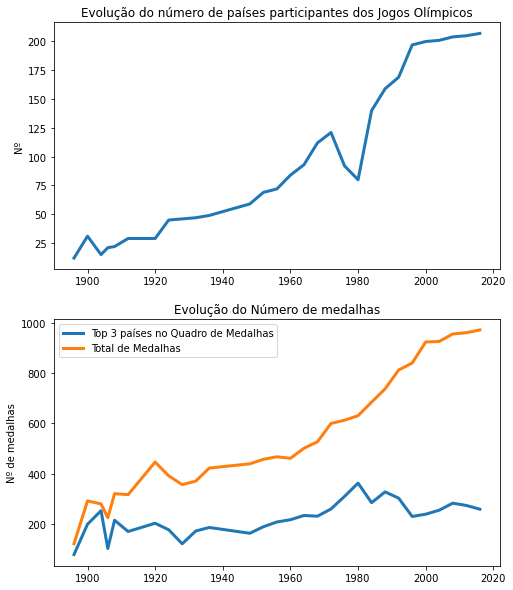

In [35]:
fig, axes = plt.subplots(2,1, figsize=(8, 10))


# 1 grafico
sns.lineplot(ax=axes[0],x="Year", y="NOC", data=paises, linewidth = 3)
axes[0].set_title('Evolução do número de países participantes dos Jogos Olímpicos')
axes[0].set_xlabel('')
axes[0].set_ylabel('Nº')

# 2 grafico
sns.lineplot(ax=axes[1],x="Year", y="Medal", data=share_total, linewidth = 3)
sns.lineplot(ax=axes[1],x="Year", y="Medalhas_totais", data=share_total, linewidth = 3)
axes[1].set_title('Evolução do Número de medalhas')
axes[1].set_xlabel('')
axes[1].set_ylabel('Nº de medalhas')
axes[1].legend(['Top 3 países no Quadro de Medalhas','Total de Medalhas'])